In [23]:
import numpy as np
import pandas as pd

In [24]:
lebron = pd.read_csv('data/NBA/1_lebron_james_shot_chart_1_2023.csv')
james = pd.read_csv('data/NBA/2_james_harden_shot_chart_2023.csv')
stephen = pd.read_csv('data/NBA/3_stephen_curry_shot_chart_2023.csv')

print(lebron.shape)
print(james.shape)
print(stephen.shape)

(1533, 15)
(1025, 15)
(1434, 15)


In [25]:
lebron.dtypes

top                     int64
left                    int64
date                   object
qtr                    object
time_remaining         object
result                   bool
shot_type               int64
distance_ft             int64
lead                     bool
lebron_team_score       int64
opponent_team_score     int64
opponent               object
team                   object
season                  int64
color                  object
dtype: object

In [26]:
lebron.head()

,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color
0,310,203,"Oct 18, 2022",1st Qtr,09:26,False,3,26,False,2,2,GSW,LAL,2023,red
1,213,259,"Oct 18, 2022",1st Qtr,08:38,False,2,16,False,4,5,GSW,LAL,2023,red
2,143,171,"Oct 18, 2022",1st Qtr,08:10,False,2,11,False,4,7,GSW,LAL,2023,red
3,68,215,"Oct 18, 2022",1st Qtr,05:24,True,2,3,False,12,19,GSW,LAL,2023,green
4,66,470,"Oct 18, 2022",1st Qtr,01:02,False,3,23,False,22,23,GSW,LAL,2023,red


In [27]:
# okay wow very clean. i wanna clean some data! lol

stephen.isnull().sum()

top                    0
left                   0
date                   0
qtr                    0
time_remaining         0
result                 0
shot_type              0
distance_ft            0
lead                   0
lebron_team_score      0
opponent_team_score    0
opponent               0
team                   0
season                 0
color                  0
dtype: int64

In [28]:
print('duplicates:', lebron.duplicated().sum())

lebron[lebron.duplicated()]
lebron = lebron.drop_duplicates()


duplicates: 1


(array([524., 162.,  91.,  62.,  60., 106.,  56., 373.,  81.,  17.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

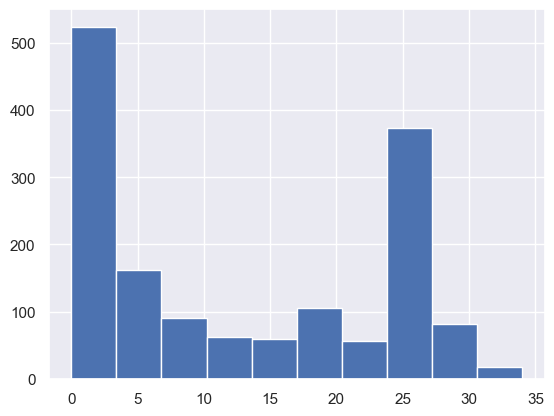

In [29]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
import seaborn as sns 

plt.hist(lebron['distance_ft'])


<Axes: xlabel='distance_ft'>

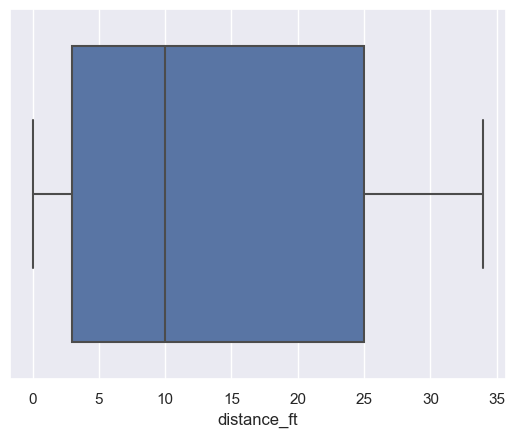

In [30]:
sns.boxplot(x=lebron['distance_ft'])

In [31]:
# this is really interesting and fun data, i want to come back to it this week

In [32]:
# none of these DFs have a column that marks the player
# so before concat, I think I need to manually add that column

#players = pd.concat([lebron, james, stephen])
#players

In [33]:
# Updated from last version, much more effecient way of creating a hierarchy

lebron.index.rename('Shot Number', inplace=True)
james.index.rename('Shot Number', inplace=True)
stephen.index.rename('Shot Number', inplace=True)

players = pd.concat([james, lebron, stephen], keys=['James', 'Lebron', 'Stephen'])
players.index.names = ['Player', 'Shot Number']
players


top  left          date      qtr time_remaining  result  \
Player  Shot Number                                                            
James   0            323   329  Oct 18, 2022  1st Qtr           8:52   False   
        1            340   265  Oct 18, 2022  1st Qtr           4:08    True   
        2            304   318  Oct 18, 2022  1st Qtr           2:51    True   
        3            116   280  Oct 18, 2022  1st Qtr           2:21    True   
        4            320   188  Oct 18, 2022  2nd Qtr           6:21    True   
...                  ...   ...           ...      ...            ...     ...   
Stephen 1429         185    79  May 12, 2023  4th Qtr           8:34   False   
        1430         193    19  May 12, 2023  4th Qtr           8:28   False   
        1431         332   214  May 12, 2023  4th Qtr           6:23   False   
        1432         310   240  May 12, 2023  4th Qtr           6:11    True   
        1433         329   283  May 12, 2023  4th Qtr           4:29    True   

                     shot_type  distance_ft   lead  lebron_team_score  \
Player  Shot Number                                                     
James   0                    3           28  False                  2   
        1                    3           29   True                 18   
        2                    3           26   True                 22   
        3                    2            7   True                 25   
        4                    3           27   True                 45   
...                        ...          ...    ...                ...   
Stephen 1429                 2           21  False                 80   
        1430                 3           26  False                 80   
        1431                 3           28  False                 85   
        1432                 3           26  False                 88   
        1433                 3           28  False                 94   

                     opponent_team_score opponent team  season  color  
Player  Shot Number                                                    
James   0                              9      BOS  PHI    2023    red  
        1                             17      BOS  PHI    2023  green  
        2                             17      BOS  PHI    2023  green  
        3                             17      BOS  PHI    2023  green  
        4                             43      BOS  PHI    2023  green  
...                                  ...      ...  ...     ...    ...  
Stephen 1429                         100      LAL  GSW    2023    red  
        1430                         100      LAL  GSW    2023    red  
        1431                         108      LAL  GSW    2023    red  
        1432                         108      LAL  GSW    2023  green  
        1433                         111      LAL  GSW    2023  green  

[3991 rows x 15 columns]

In [34]:
# Stephen Curry, king of three-pointers!

players[(players.distance_ft > 33) & (players.result == True)]

top  left          date      qtr time_remaining  result  \
Player  Shot Number                                                            
Stephen 41           384   344  Oct 21, 2022  4th Qtr           1:11    True   
        851          362   370  Mar 15, 2023  1st Qtr           0:27    True   
        920          358    93  Mar 20, 2023  2nd Qtr           4:33    True   

                     shot_type  distance_ft   lead  lebron_team_score  \
Player  Shot Number                                                     
Stephen 41                   3           35  False                114   
        851                  3           34  False                 23   
        920                  3           34   True                 44   

                     opponent_team_score opponent team  season  color  
Player  Shot Number                                                    
Stephen 41                           121      DEN  GSW    2023  green  
        851                           25      LAC  GSW    2023  green  
        920                           40      HOU  GSW    2023  green

In [35]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
import seaborn as sns

<Axes: xlabel='distance_ft'>

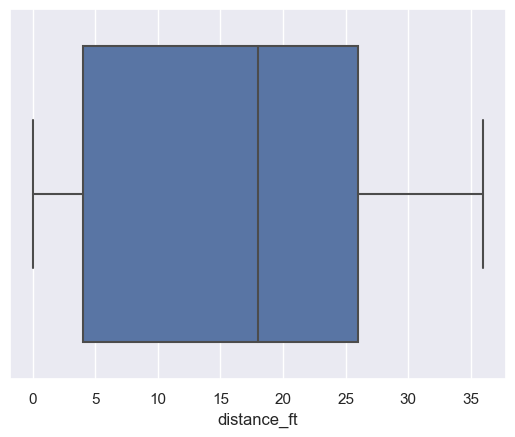

In [36]:
sns.boxplot(x=players['distance_ft'])

In [37]:
players = players.rename(columns={'lebron_team_score':'home_team_score'})

players

top  left          date      qtr time_remaining  result  \
Player  Shot Number                                                            
James   0            323   329  Oct 18, 2022  1st Qtr           8:52   False   
        1            340   265  Oct 18, 2022  1st Qtr           4:08    True   
        2            304   318  Oct 18, 2022  1st Qtr           2:51    True   
        3            116   280  Oct 18, 2022  1st Qtr           2:21    True   
        4            320   188  Oct 18, 2022  2nd Qtr           6:21    True   
...                  ...   ...           ...      ...            ...     ...   
Stephen 1429         185    79  May 12, 2023  4th Qtr           8:34   False   
        1430         193    19  May 12, 2023  4th Qtr           8:28   False   
        1431         332   214  May 12, 2023  4th Qtr           6:23   False   
        1432         310   240  May 12, 2023  4th Qtr           6:11    True   
        1433         329   283  May 12, 2023  4th Qtr           4:29    True   

                     shot_type  distance_ft   lead  home_team_score  \
Player  Shot Number                                                   
James   0                    3           28  False                2   
        1                    3           29   True               18   
        2                    3           26   True               22   
        3                    2            7   True               25   
        4                    3           27   True               45   
...                        ...          ...    ...              ...   
Stephen 1429                 2           21  False               80   
        1430                 3           26  False               80   
        1431                 3           28  False               85   
        1432                 3           26  False               88   
        1433                 3           28  False               94   

                     opponent_team_score opponent team  season  color  
Player  Shot Number                                                    
James   0                              9      BOS  PHI    2023    red  
        1                             17      BOS  PHI    2023  green  
        2                             17      BOS  PHI    2023  green  
        3                             17      BOS  PHI    2023  green  
        4                             43      BOS  PHI    2023  green  
...                                  ...      ...  ...     ...    ...  
Stephen 1429                         100      LAL  GSW    2023    red  
        1430                         100      LAL  GSW    2023    red  
        1431                         108      LAL  GSW    2023    red  
        1432                         108      LAL  GSW    2023  green  
        1433                         111      LAL  GSW    2023  green  

[3991 rows x 15 columns]